# [북극 해빙 예측 AI](https://dacon.io/competitions/official/235706/overview/)

## [북극해빙감시시스템](http://seaice.kma.go.kr/arcticPageLink.do?menuNo=51&link=cmm%2FsysSummary)

### <제공된 데이터>
train.csv : train 데이터 월 및 파일명    

train : 훈련용 npy 데이터 (1978 ~ 2018년 월별 482개 데이터) 
* 각 파일(*.npy)는 해빙농도(0~250), 북극점(위성관측불가지역), 해안선 마스크, 육지마스크, 결측값 5개의 채널로 구성 
* npy 파일 : Numpy 라이브러리 배열 파일 
    np.load : 데이터 Load 


sample_submission.csv : 정답 제출파일     
* month 칼럼의 워의 북극 해빙 농도를 예측 후 2차원(448 x 304)을 1차원 배열 (136,192)로 변환하여 제출 
* 각 파일(*.npy)에 예측 이미지 픽셀 값을 136,192개의 열에 입력 
* F1 score 는 정답 해빙 농도 5% ~ 50% 픽셀만 이용하여 계산 


## 1. Shared Code 따라하기

In [49]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import seaborn as sns
import collections

In [2]:
def sorted_list(path):
    tmplist = glob.glob(path)
    tmplist.sort()
    
    return tmplist 


def read_csv(path):
    df = pd.read_csv(path)
    
    return df 


def load_npy(path):
    npy = np.load(path)
    
    return npy 

def show_data(npy):
    
    num_channel = npy.shape[-1]
    plt.figure(figsize = ( 3*num_channel, 5 ))
    
    for channel in range(num_channel):
        
        tmping = npy[:,:,channel]
        
        plt.subplot(1, num_channel, channel + 1)
        plt.imshow(tmping)
        
        
    plt.tight_layout()
    plt.show()
    plt.close()

In [4]:
list_train = sorted_list(os.path.join('data/train','*'))
print(list_train)

['train/197811.npy', 'train/197812.npy', 'train/197901.npy', 'train/197902.npy', 'train/197903.npy', 'train/197904.npy', 'train/197905.npy', 'train/197906.npy', 'train/197907.npy', 'train/197908.npy', 'train/197909.npy', 'train/197910.npy', 'train/197911.npy', 'train/197912.npy', 'train/198001.npy', 'train/198002.npy', 'train/198003.npy', 'train/198004.npy', 'train/198005.npy', 'train/198006.npy', 'train/198007.npy', 'train/198008.npy', 'train/198009.npy', 'train/198010.npy', 'train/198011.npy', 'train/198012.npy', 'train/198101.npy', 'train/198102.npy', 'train/198103.npy', 'train/198104.npy', 'train/198105.npy', 'train/198106.npy', 'train/198107.npy', 'train/198108.npy', 'train/198109.npy', 'train/198110.npy', 'train/198111.npy', 'train/198112.npy', 'train/198201.npy', 'train/198202.npy', 'train/198203.npy', 'train/198204.npy', 'train/198205.npy', 'train/198206.npy', 'train/198207.npy', 'train/198208.npy', 'train/198209.npy', 'train/198210.npy', 'train/198211.npy', 'train/198212.npy',

In [6]:
len(list_train)

482

In [8]:
df_train = read_csv('data/train.csv')
df_train

,month,file_nm
0,1978-11,197811.npy
1,1978-12,197812.npy
2,1979-01,197901.npy
3,1979-02,197902.npy
4,1979-03,197903.npy
...,...,...
477,2018-08,201808.npy
478,2018-09,201809.npy
479,2018-10,201810.npy
480,2018-11,201811.npy


In [14]:
df_train.shape[0]

482

In [10]:
df_sub = read_csv('data/sample_submission.csv')
df_sub.head(5)

,month,0,1,2,3,4,5,6,7,8,...,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,2019-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_sub.shape

(24, 136193)

## Confirm NPY file 

* npy 파일을 이미지로 출력 
* npy 파일은 해빙농도, 북극점, 해안선 마스크, 육지마스크, 결측값 5개의 채널로 구성됨 

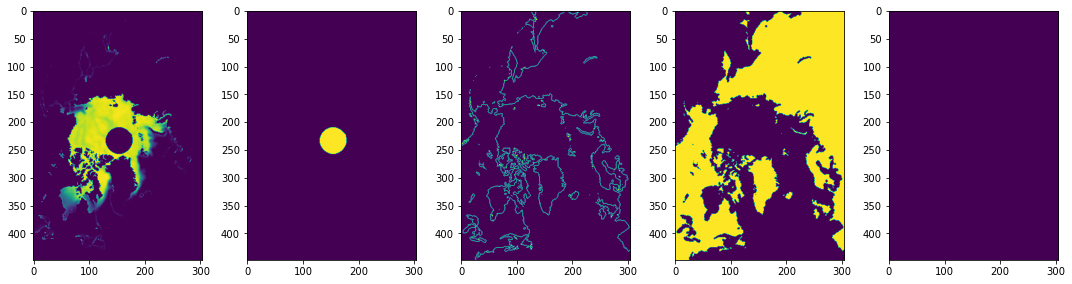

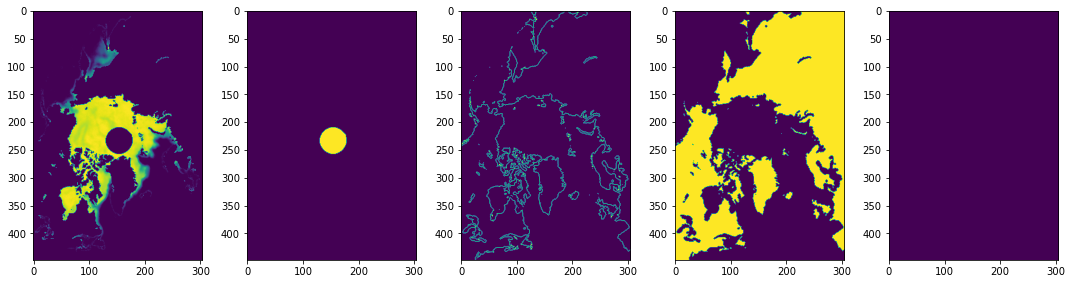

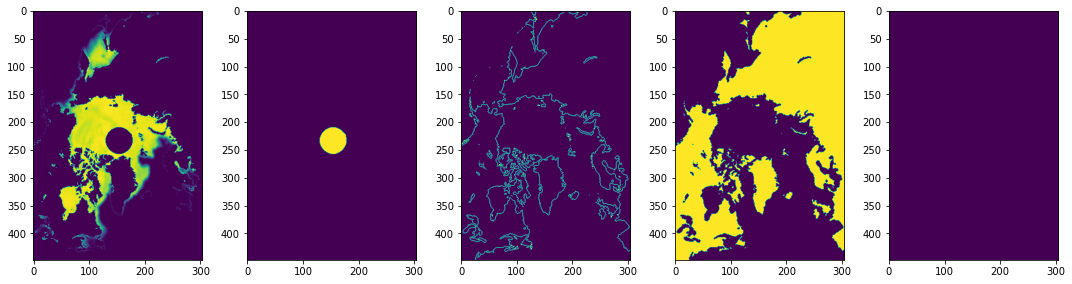

In [17]:
for idx in range(df_train.shape[0]):
    name_npy = df_train['file_nm'].iloc[idx]
    tmpnpy = load_npy(os.path.join('data/train',name_npy))
    
    show_data(npy = tmpnpy)
    
    if (idx > 1): break

In [20]:
filenames = os.listdir('data/train')
filenames.sort()

In [22]:
data = []

for filename in tqdm(filenames):
    data.append(
        np.load(f"data/train/{filename}"))ㅎ
    
data = np.array(data)

100%|██████████| 482/482 [00:02<00:00, 201.49it/s]


In [23]:
data.shape

(482, 448, 304, 5)

### 결측값 Missing Value

In [26]:
print(f'There are {data[:,:,:,-1].sum()} missing pixels')

There are 0 missing pixels


### Coastline, Land Shape 

해안선 channel = 2     
육지 channel = 3 

모든 npy 파일의 해안선 마스크와 육지 마스크의 값은 동일하다. 

In [30]:
data.shape

(482, 448, 304, 5)

In [28]:
data[0][:,:,2].shape

(448, 304)

In [29]:
data.shape[0]

482

In [32]:
a = np.zeros(shape = data[0][:,:,2].shape)

for i in tqdm(range(data.shape[0])):
    a += data[i][:,:,2]
    

a = ( a/ data.shape[0]).astype(int)
(a - data[i][:,:,2]).sum()

100%|██████████| 482/482 [00:00<00:00, 2993.10it/s]


0

In [33]:
a = np.zeros(shape = data[0][:,:,3].shape)

for i in tqdm(range(data.shape[0])):
    a += data[i][:,:,3]
    

a = ( a/ data.shape[0]).astype(int)
(a - data[i][:,:,3]).sum()

100%|██████████| 482/482 [00:00<00:00, 3082.24it/s]


0

In [58]:
(data[0][:,:,2]+ data[0][:,:,3]).max()

1

해안선과 육지 마스크가 둘다 1인 경우는 없음. 

In [65]:
collections.Counter(data[0][:,:,2].flatten())

Counter({0: 131140, 1: 5052})

In [66]:
collections.Counter(data[0][:,:,3].flatten())

Counter({0: 72980, 1: 63212})

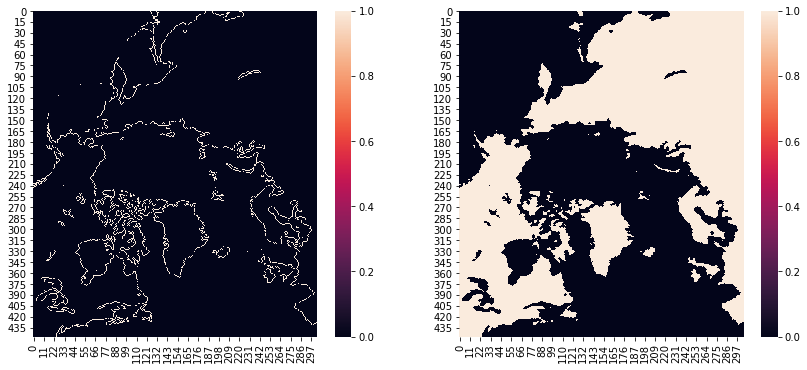

In [59]:
figure, (ax1, ax2) = plt.subplots(1,2)

figure.set_size_inches(14,6)
sns.heatmap(data[0][:,:,2], ax = ax1)
sns.heatmap(data[0][:,:,3], ax = ax2)

### North Pole Area 

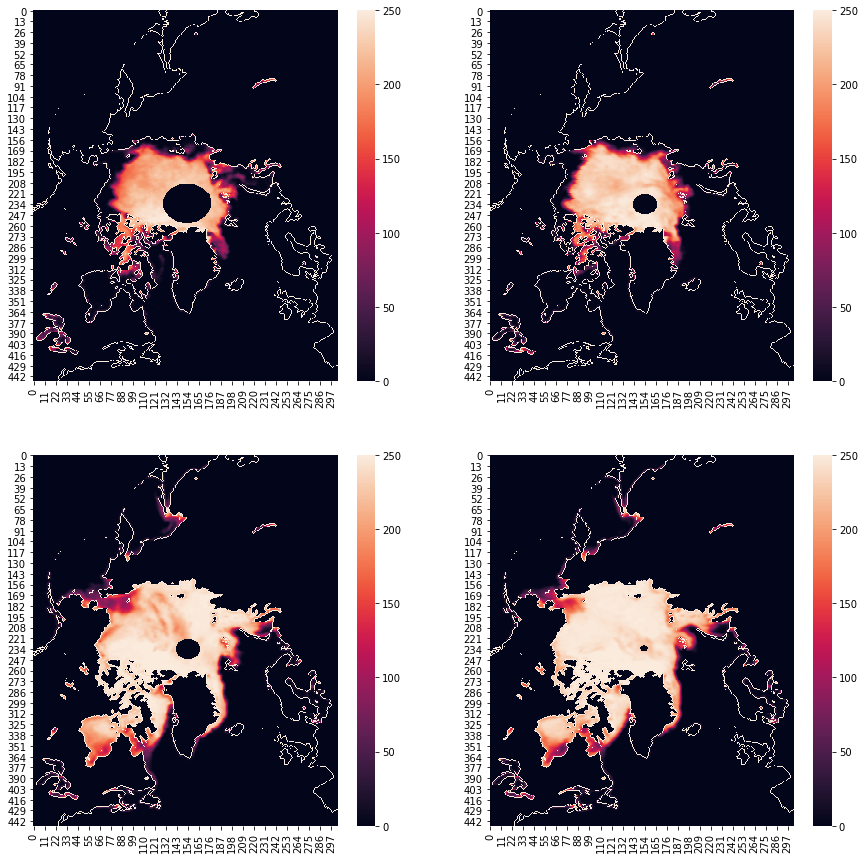

In [55]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)

figure.set_size_inches(15,15)

# data[][:,:,0] : 해빙농도 
# data[][:,:,2] : 해안선 마스크 * 250 
sns.heatmap(data[105][:,:,0] + (data[105][:,:,2]) * 250 , ax = ax1)
sns.heatmap(data[106][:,:,0] + (data[106][:,:,2]) * 250 , ax = ax2)
sns.heatmap(data[349][:,:,0] + (data[349][:,:,2]) * 250 , ax = ax3)
sns.heatmap(data[481][:,:,0] + (data[481][:,:,2]) * 250 , ax = ax4)